<a href="https://colab.research.google.com/github/LeylaY1996/sentiment-analysis-aws-reviews/blob/main/19032025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

leylayilmaz_amazon_path = kagglehub.dataset_download('leylayilmaz/amazon')

print('Data source import complete.')


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
Orijinal veri seti boyutu: (113691, 10)


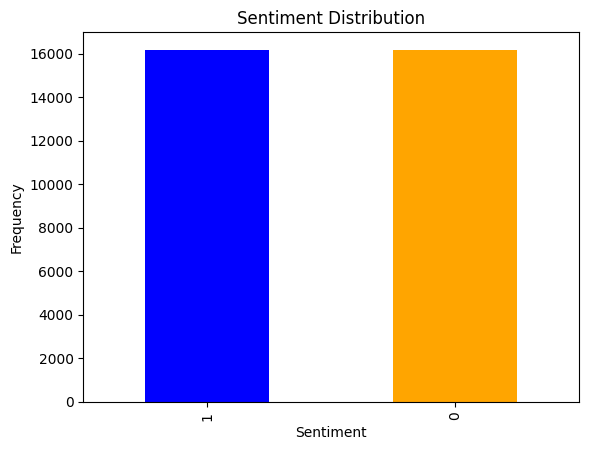

• Ortalama kelime sayısı: 42.18 kelime
• Standart sapma (kelime): 43.13
• En kısa yorum (kelime): 3 kelime
• En uzun yorum (kelime): 1010 kelime

• Ortalama karakter sayısı: 277.64 karakter
• Standart sapma (karakter): 290.05
• En kısa yorum (karakter): 14 karakter
• En uzun yorum (karakter): 7559 karakter


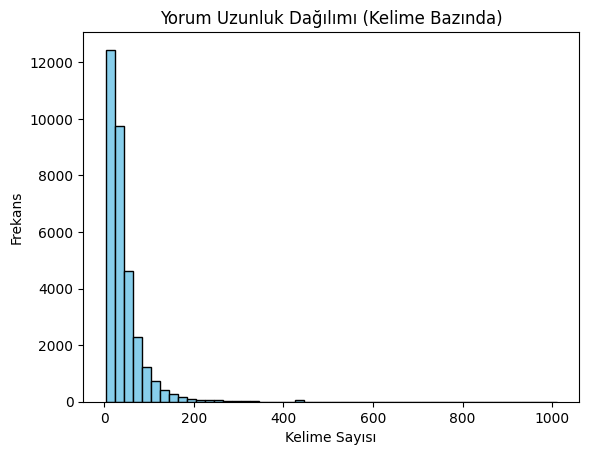

Aykırı değerler çıkarıldıktan sonra veri seti boyutu: (31821, 6)


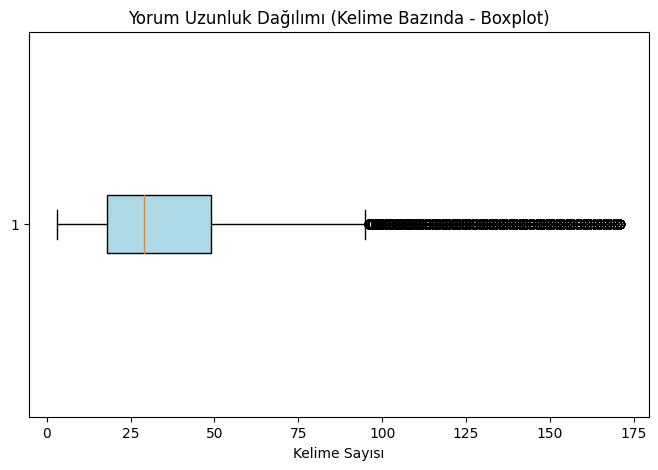

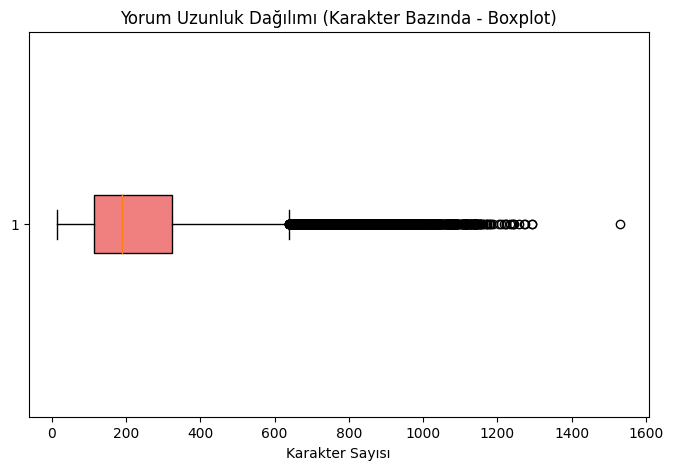

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from scipy import stats

# Stopwords yükle
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

def clean_text(text):
    """Metni temizler: küçük harfe çevirir, noktalama işaretlerini kaldırır ve durak kelimeleri filtreler."""
    text = str(text).lower()  # Küçük harfe çevir
    text = ''.join([char for char in text if char not in punctuation])  # Noktalama işaretlerini kaldır
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Durak kelimeleri filtrele
    return text

def prepare_data(csv_file):
    """Veri setini hazırlar: yükler, temizler ve etiketler."""
    df = pd.read_csv(csv_file)  # Hata ayıklama ve optimizasyon
    df = df.sample(frac=0.2, random_state=42)  # Veri setinin %20'sini seç
    print("Orijinal veri seti boyutu:", df.shape)

    # Gerekli sütunları seç
    df = df[['Text', 'Score', 'ProductId', 'UserId']]

    # Score 3 olanları çıkar
    df = df[df['Score'] != 3]

    # Sentiment etiketini oluştur
    df['Sentiment'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

    # Yorumları temizle
    df['cleaned_review'] = df['Text'].apply(clean_text)

    return df[['cleaned_review', 'Sentiment', 'ProductId', 'UserId']]

# Veriyi yükle ve hazırla
csv_file_path = '/kaggle/input/amazon/Reviews 3.csv'  # Dosya yolunuza göre güncelleyin
prepared_data = prepare_data(csv_file_path)

# Veri dengesini sağlama
positive_samples = prepared_data[prepared_data['Sentiment'] == 1]
negative_samples = prepared_data[prepared_data['Sentiment'] == 0]
min_samples = min(len(positive_samples), len(negative_samples))

balanced_data = pd.concat([positive_samples.sample(min_samples, random_state=42),
                           negative_samples.sample(min_samples, random_state=42)])

# Histogram çizme (Sentiment dağılımı)
balanced_data['Sentiment'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# **Yorum uzunluklarını hesapla**
balanced_data['review_length'] = balanced_data['cleaned_review'].apply(lambda x: len(x.split()))  # Kelime bazında
balanced_data['char_length'] = balanced_data['cleaned_review'].apply(len)  # Karakter bazında

# **İstatistikleri hesapla**
mean_word_length = balanced_data['review_length'].mean()
std_word_length = balanced_data['review_length'].std()
min_word_length = balanced_data['review_length'].min()
max_word_length = balanced_data['review_length'].max()

mean_char_length = balanced_data['char_length'].mean()
std_char_length = balanced_data['char_length'].std()
min_char_length = balanced_data['char_length'].min()
max_char_length = balanced_data['char_length'].max()

# **Sonuçları yazdır**
print(f"• Ortalama kelime sayısı: {mean_word_length:.2f} kelime")
print(f"• Standart sapma (kelime): {std_word_length:.2f}")
print(f"• En kısa yorum (kelime): {min_word_length} kelime")
print(f"• En uzun yorum (kelime): {max_word_length} kelime\n")

print(f"• Ortalama karakter sayısı: {mean_char_length:.2f} karakter")
print(f"• Standart sapma (karakter): {std_char_length:.2f}")
print(f"• En kısa yorum (karakter): {min_char_length} karakter")
print(f"• En uzun yorum (karakter): {max_char_length} karakter")

# **Histogram çizme (Yorum uzunluğu)**
plt.hist(balanced_data['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Yorum Uzunluk Dağılımı (Kelime Bazında)')
plt.xlabel('Kelime Sayısı')
plt.ylabel('Frekans')
plt.show()

# **Aykırı değer kontrolü**
z_scores = np.abs(stats.zscore(balanced_data['review_length']))
balanced_data = balanced_data[(z_scores < 3)]
print("Aykırı değerler çıkarıldıktan sonra veri seti boyutu:", balanced_data.shape)

# **Boxplot çizme (kelime bazında)**
plt.figure(figsize=(8, 5))
plt.boxplot(balanced_data['review_length'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Yorum Uzunluk Dağılımı (Kelime Bazında - Boxplot)')
plt.xlabel('Kelime Sayısı')
plt.show()

# **Boxplot çizme (karakter bazında)**
plt.figure(figsize=(8, 5))
plt.boxplot(balanced_data['char_length'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightcoral"))
plt.title('Yorum Uzunluk Dağılımı (Karakter Bazında - Boxplot)')
plt.xlabel('Karakter Sayısı')
plt.show()

In [ ]:
# Confusion Matrix'i görselleştir
def plot_confusion_matrix(cm):
    """Confusion matrix'i görselleştirir."""
    fig, ax = plt.subplots(figsize=(6,6))
    ax.matshow(cm, cmap='Blues', alpha=0.6)
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='red')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text(train_text, test_text, max_features=10000, ngram_range=(1, 2)):
    """
    Metinleri TF-IDF ile vektörize eder.
    """
    vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range)
    X_train_tfidf = vectorizer.fit_transform(train_text)
    X_test_tfidf = vectorizer.transform(test_text)
    return X_train_tfidf, X_test_tfidf, vectorizer

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(df, feature_column, target_column, test_size=0.2, random_state=42):
    """
    Veri çerçevesini eğitim ve test setine böler.

    Args:
    - df: Veri çerçevesi (pandas DataFrame).
    - feature_column: Özellik sütunu adı (ör. metin verisi).
    - target_column: Hedef sütunu adı (etiketler).
    - test_size: Test setinin boyutu (varsayılan: 0.2).
    - random_state: Rastgele durum kontrolü için tohum (varsayılan: 42).

    Returns:
    - X_train: Eğitim seti özellikleri.
    - X_test: Test seti özellikleri.
    - y_train: Eğitim seti etiketleri.
    - y_test: Test seti etiketleri.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        df[feature_column],
        df[target_column],
        test_size=test_size,
        random_state=random_state,
        stratify=df[target_column]  # Sınıf dengesini korumak için stratify
    )
    return X_train, X_test, y_train, y_test

In [ ]:
from imblearn.over_sampling import SMOTE

def apply_smote(X, y, random_state=42):
    """
    SMOTE ile azınlık sınıfını artırır.
    """
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Modeli eğitir ve değerlendirme metriklerini döner.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, report, cm

SVM with SMOTE Accuracy (Balanced Data): 0.8956794972505892
SVM with SMOTE Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      3176
           1       0.90      0.89      0.90      3189

    accuracy                           0.90      6365
   macro avg       0.90      0.90      0.90      6365
weighted avg       0.90      0.90      0.90      6365

SVM with SMOTE Confusion Matrix (Balanced Data):
 [[2853  323]
 [ 341 2848]]


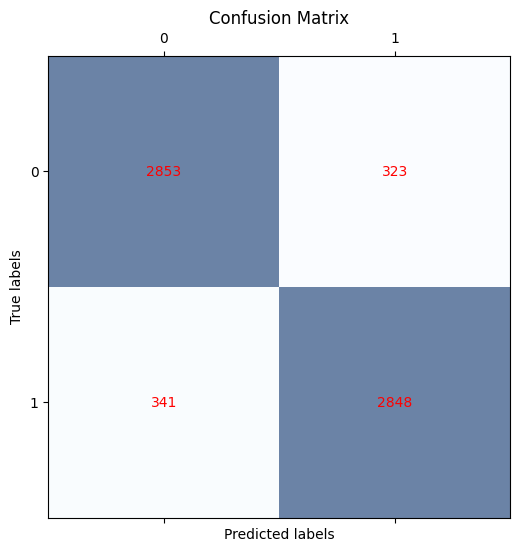

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def svm_with_smote_sentiment_analysis_balanced(df):
    """Balanced veri seti ile SVM ve SMOTE kullanarak duygu analizi yapar."""

    # Eğitim ve test setine ayırma
    X_train, X_test, y_train, y_test = split_data(df, 'cleaned_review', 'Sentiment')

    # TF-IDF vektörleştirme
    X_train_tfidf, X_test_tfidf, _ = vectorize_text(X_train, X_test)

    # SMOTE ile veri dengeleme
    X_train_resampled, y_train_resampled = apply_smote(X_train_tfidf, y_train)

    # SVM modeli oluştur ve değerlendir
    model = SVC(kernel='linear', class_weight='balanced', random_state=42)
    accuracy, report, cm = train_and_evaluate_model(
        model, X_train_resampled, y_train_resampled, X_test_tfidf, y_test
    )

    return accuracy, report, cm

# SVM analizi
accuracy, report, cm = svm_with_smote_sentiment_analysis_balanced(balanced_data)

# Sonuçları yazdır
print("SVM with SMOTE Accuracy (Balanced Data):", accuracy)
print("SVM with SMOTE Classification Report (Balanced Data):\n", report)
print("SVM with SMOTE Confusion Matrix (Balanced Data):\n", cm)

plot_confusion_matrix(cm)

Naive Bayes with SMOTE Accuracy: 0.8805970149253731
Naive Bayes with SMOTE Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      3176
           1       0.88      0.88      0.88      3189

    accuracy                           0.88      6365
   macro avg       0.88      0.88      0.88      6365
weighted avg       0.88      0.88      0.88      6365

Naive Bayes with SMOTE Confusion Matrix:
 [[2785  391]
 [ 369 2820]]


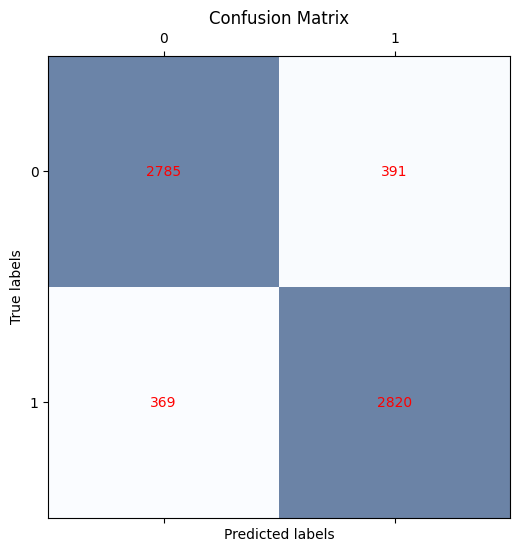

In [ ]:
from sklearn.naive_bayes import MultinomialNB

def naive_bayes_with_smote_sentiment_analysis(df):
    """Naive Bayes ve SMOTE kullanarak duygu analizi yapar."""

    # Eğitim ve test setine ayırma
    X_train, X_test, y_train, y_test = split_data(df, 'cleaned_review', 'Sentiment')

    # TF-IDF vektörleştirme
    X_train_tfidf, X_test_tfidf, _ = vectorize_text(X_train, X_test)

    # SMOTE ile veri dengeleme
    X_train_resampled, y_train_resampled = apply_smote(X_train_tfidf, y_train)

    # Naive Bayes modelini oluştur
    model = MultinomialNB()

    # Modeli eğit ve değerlendir
    accuracy, report, cm = train_and_evaluate_model(
        model, X_train_resampled, y_train_resampled, X_test_tfidf, y_test
    )

    return accuracy, report, cm

# Naive Bayes analizi
accuracy, report, cm = naive_bayes_with_smote_sentiment_analysis(balanced_data)

# Sonuçları yazdır
print("Naive Bayes with SMOTE Accuracy:", accuracy)
print("Naive Bayes with SMOTE Classification Report:\n", report)
print("Naive Bayes with SMOTE Confusion Matrix:\n", cm)

plot_confusion_matrix(cm)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_text_with_tokenizer(train_text, test_text, max_length=100):
    """
    Metinleri tokenize eder ve belirli bir uzunlukta padding uygular.
    """
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_text)

    # Sayısal verilere dönüştürme
    train_seq = tokenizer.texts_to_sequences(train_text)
    test_seq = tokenizer.texts_to_sequences(test_text)

    # Padding işlemi
    train_padded = pad_sequences(train_seq, maxlen=max_length, padding='post')
    test_padded = pad_sequences(test_seq, maxlen=max_length, padding='post')

    return train_padded, test_padded, tokenizer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

def build_rnn_model(input_dim, max_length, embedding_dim=100):
    """
    RNN (Bidirectional LSTM) modeli oluşturur.
    """
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=max_length))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 84s 193ms/step - accuracy: 0.7047 - loss: 0.7039 - val_accuracy: 0.8790 - val_loss: 0.3058
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 76s 189ms/step - accuracy: 0.9287 - loss: 0.2653 - val_accuracy: 0.8716 - val_loss: 0.3362
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 76s 190ms/step - accuracy: 0.9639 - loss: 0.1544 - val_accuracy: 0.8606 - val_loss: 0.3775
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 77s 193ms/step - accuracy: 0.9760 - loss: 0.1017 - val_accuracy: 0.8713 - val_loss: 0.4260
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 76s 190ms/step - accuracy: 0.9851 - loss: 0.0688 - val_accuracy: 0.8600 - val_loss: 0.5453
Epoch 6/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 77s 193ms/step - accuracy: 0.9881 - loss: 0.0549 - val_accuracy: 0.8616 - val_loss: 0.5694
Epoch 7/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 82s 205ms/step - accuracy: 0.9909 - loss: 0.0407 - val_accuracy: 0.8625 - val_loss: 0.5747
Epoch 8/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 76s 190ms/step - accuracy: 0.9940 - loss: 0

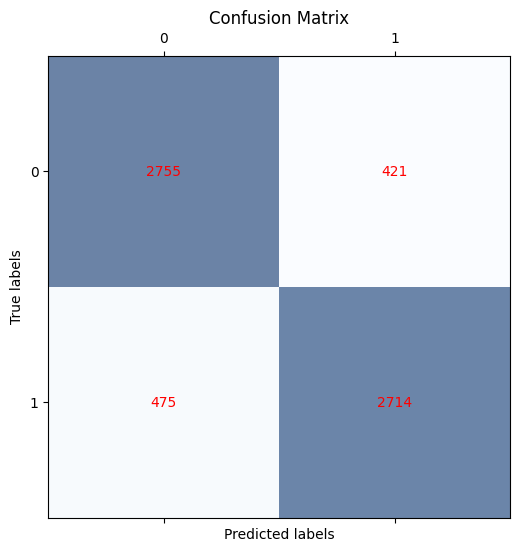

In [ ]:
def rnn_with_balancing_smote(df):
    """RNN (Bidirectional LSTM) ve SMOTE kullanarak duygu analizi yapar."""

    # Eğitim ve test setine ayırma
    X_train, X_test, y_train, y_test = split_data(df, 'cleaned_review', 'Sentiment')

    # Metin ön işleme (tokenize ve padding)
    max_length = 100
    X_train_padded, X_test_padded, tokenizer = preprocess_text_with_tokenizer(X_train, X_test, max_length)

    # SMOTE ile veri dengeleme
    X_train_resampled, y_train_resampled = apply_smote(X_train_padded, y_train)

    # Model oluşturma
    input_dim = len(tokenizer.word_index) + 1  # Tokenizer'daki toplam kelime sayısı
    model = build_rnn_model(input_dim, max_length)

    # Modeli eğitme
    model.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=10,
        batch_size=64,
        validation_data=(X_test_padded, y_test),
        class_weight={0: 2, 1: 1}  # Sınıf ağırlıkları
    )

    # Tahmin yap
    y_pred = (model.predict(X_test_padded) > 0.5).astype("int32").flatten()

    # Sonuçları değerlendir
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, report, cm

# Balanced data ile RNN analizi
accuracy, report, cm = rnn_with_balancing_smote(balanced_data)

# Sonuçları yazdır
print("SMOTE ile dengelenmiş RNN Accuracy:", accuracy)
print("SMOTE ile dengelenmiş RNN Classification Report:\n", report)
print("SMOTE ile dengelenmiş RNN Confusion Matrix:\n", cm)

plot_confusion_matrix(cm)

Lexicon-Based SMOTE Accuracy: 0.9039313660790045
Lexicon-Based SMOTE Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90     15879
           1       0.90      0.91      0.90     15942

    accuracy                           0.90     31821
   macro avg       0.90      0.90      0.90     31821
weighted avg       0.90      0.90      0.90     31821

Lexicon-Based SMOTE Confusion Matrix:
 [[14267  1612]
 [ 1445 14497]]


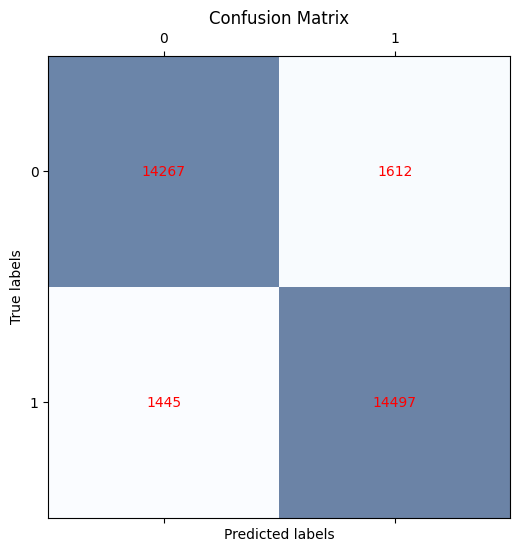

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Pozitif ve negatif kelimelerin listesi
positive_words = ['good', 'great', 'excellent', 'awesome', 'nice']
negative_words = ['bad', 'terrible', 'poor', 'worst', 'awful']

def lexicon_based_sentiment_analysis_with_smote_balanced(df):
    """Lexicon-based sentiment analizi SMOTE ile ve balanced_data kullanarak."""

    # Her yorumdaki kelimeleri analiz ederek duygu puanı döndür
    def get_sentiment(text):
        words = text.split()
        score = 0
        for word in words:
            if word in positive_words:
                score += 1
            elif word in negative_words:
                score -= 1
        return 1 if score > 0 else 0

    # Duygu etiketlerini tahmin et
    df['Lexicon_Sentiment'] = df['cleaned_review'].apply(get_sentiment)

    # Özellik ve etiketleri ayırma
    X = df['cleaned_review']  # Özellikler: Temizlenmiş yorumlar
    y = df['Sentiment']  # Etiketler: Gerçek duygu etiketleri

    # TF-IDF vektörleştirme
    X_train_tfidf, X_test_tfidf, _ = vectorize_text(X, X)

    # SMOTE uygulama
    X_res, y_res = apply_smote(X_train_tfidf, y)

    # Modeli eğitme ve tahmin
    model = MultinomialNB()
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test_tfidf)

    # Tahminleri değerlendirme
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred)
    cm = confusion_matrix(y, y_pred)

    # Sonuçları yazdır
    print("Lexicon-Based SMOTE Accuracy:", accuracy)
    print("Lexicon-Based SMOTE Classification Report:\n", report)
    print("Lexicon-Based SMOTE Confusion Matrix:\n", cm)

    # Confusion matrix'i görselleştir
    plot_confusion_matrix(cm)

    return accuracy, report, cm

# Lexicon-based fonksiyonunu balanced_data ile çağırma
accuracy, report, cm = lexicon_based_sentiment_analysis_with_smote_balanced(balanced_data)

Aspect-Based Sentiment Analysis with SMOTE
Accuracy: 0.6290929619872037
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.77      0.67     15942
           1       0.68      0.49      0.57     15942

    accuracy                           0.63     31884
   macro avg       0.64      0.63      0.62     31884
weighted avg       0.64      0.63      0.62     31884

Confusion Matrix:
 [[12259  3683]
 [ 8143  7799]]


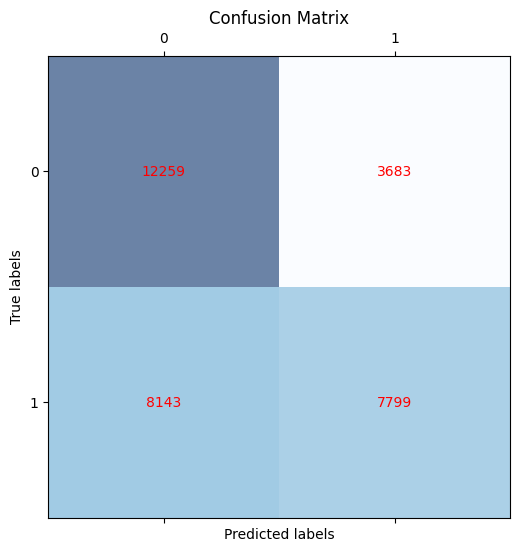

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Aspect kelime listeleri
aspects = {
    'hız': ['fast', 'quick', 'speed', 'late', 'delayed'],
    'kalite': ['good', 'great', 'excellent', 'poor', 'bad', 'terrible', 'quality']
}

def aspect_based_sentiment_analysis_with_smote_balanced(df):
    """Aspect-based sentiment analizi SMOTE ile ve balanced_data kullanarak."""

    # Her özellik için duygu analizi yap
    def get_aspect_sentiment(text):
        words = text.split()
        aspect_scores = {aspect: 0 for aspect in aspects.keys()}
        for word in words:
            for aspect, keywords in aspects.items():
                if word in keywords:
                    aspect_scores[aspect] += 1
        return aspect_scores['hız'], aspect_scores['kalite']

    # Her bir yorum için aspect-based duygu analizi yap
    df[['Aspect_Hız', 'Aspect_Kalite']] = df['cleaned_review'].apply(get_aspect_sentiment).apply(pd.Series)

    # CountVectorizer ile kelime sıklığı (word count) çıkarımı
    vectorizer = CountVectorizer(vocabulary=sum(aspects.values(), []))
    X_aspects = vectorizer.fit_transform(df['cleaned_review']).toarray()

    # SMOTE uygulama (X: özellikler, y: etiketler)
    smote = SMOTE(k_neighbors=3)
    X_res, y_res = apply_smote(X_aspects, df['Sentiment'])

    # Model tanımlama
    model = RandomForestClassifier(random_state=42)

    # Model eğitimi
    model.fit(X_res, y_res)
    y_pred = model.predict(X_res)

    # Sonuçların değerlendirilmesi
    accuracy = accuracy_score(y_res, y_pred)
    report = classification_report(y_res, y_pred)
    cm = confusion_matrix(y_res, y_pred)

    # Sonuçların yazdırılması
    print("Aspect-Based Sentiment Analysis with SMOTE")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)

    return accuracy, report, cm

# Aspect-based fonksiyonunu çağırma
accuracy, report, cm = aspect_based_sentiment_analysis_with_smote_balanced(balanced_data)
plot_confusion_matrix(cm)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7893 - loss: 0.4415 - val_accuracy: 0.8918 - val_loss: 0.2646
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9452 - loss: 0.1557 - val_accuracy: 0.8902 - val_loss: 0.2822
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9667 - loss: 0.0980 - val_accuracy: 0.8855 - val_loss: 0.3442
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9851 - loss: 0.0463 - val_accuracy: 0.8803 - val_loss: 0.4325
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.8819 - val_loss: 0.5490
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN with SMOTE Accuracy (Balanced Data): 0.8818538884524745
CNN with SMOTE Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      3176
           1       0.88      0.88      0.88      3189

    accuracy                           0

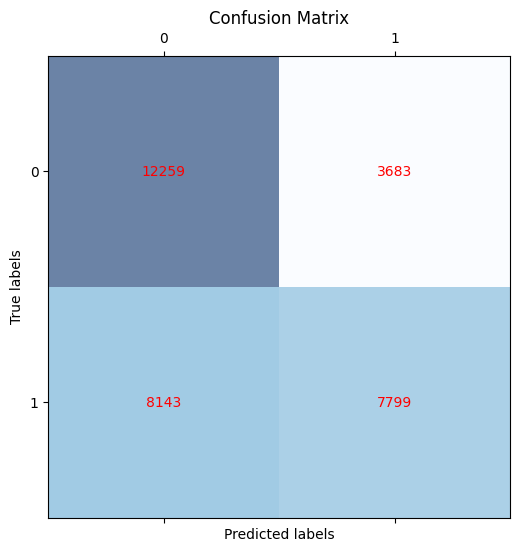

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def cnn_with_smote_sentiment_analysis_balanced(df):
    """Balanced veri seti ile CNN ve SMOTE kullanarak duygu analizi yapar ve sonuçları döner."""
    # Eğitim ve test setine ayırma
    X_train, X_test, y_train, y_test = split_data(df, 'cleaned_review', 'Sentiment')

    # TF-IDF vektörleştirme
    X_train_tfidf, X_test_tfidf, _ = vectorize_text(X_train, X_test)

    # SMOTE ile veri artırımı
    X_train_resampled, y_train_resampled = apply_smote(X_train_tfidf, y_train)

    # CNN Modelini oluştur
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary sınıflandırma için sigmoid
    ])

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Modeli eğit
    model.fit(
        X_train_resampled, y_train_resampled,
        epochs=5,
        batch_size=64,
        validation_data=(X_test_tfidf, y_test)
    )

    # Test seti üzerinde tahmin yap
    y_pred = model.predict(X_test_tfidf)
    y_pred = (y_pred > 0.5).astype(int).flatten()  # Sigmoid çıktıyı 0 veya 1'e dönüştür

    # Sonuçları yazdır
    print("CNN with SMOTE Accuracy (Balanced Data):", accuracy_score(y_test, y_pred))
    print("CNN with SMOTE Classification Report (Balanced Data):\n", classification_report(y_test, y_pred))
    print("CNN with SMOTE Confusion Matrix (Balanced Data):\n", confusion_matrix(y_test, y_pred))

    return accuracy, report, cm

# CNN analizi SMOTE ile balanced_data kullanılarak
accuracy, report, cm = cnn_with_smote_sentiment_analysis_balanced(balanced_data)

# Confusion Matrix'i görselleştir
plot_confusion_matrix(cm)

In [ ]:
from gensim.models import Word2Vec
import numpy as np

def train_word2vec(corpus):
    """
    Word2Vec modelini eğitir ve kelimeler için vektörleri döndürür.
    """
    tokenized_corpus = [text.split() for text in corpus]  # Her yorumu tokenize et
    model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)
    return model

def vectorize_text_with_word2vec(texts, model):
    """
    Word2Vec ile metni vektörize eder.
    """
    def average_word_vectors(words, model, vector_size):
        # Her kelimenin vektör ortalamasını al
        feature_vec = np.zeros((vector_size,), dtype='float32')
        n_words = 0
        for word in words:
            if word in model.wv:
                feature_vec = np.add(feature_vec, model.wv[word])
                n_words += 1
        if n_words > 0:
            feature_vec = np.divide(feature_vec, n_words)
        return feature_vec

    vector_size = model.vector_size
    return np.array([average_word_vectors(text.split(), model, vector_size) for text in texts])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Word2Vec Sentiment Analysis Accuracy: 0.8191673212882954
Word2Vec Sentiment Analysis Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      3176
           1       0.83      0.81      0.82      3189

    accuracy                           0.82      6365
   macro avg       0.82      0.82      0.82      6365
weighted avg       0.82      0.82      0.82      6365

Word2Vec Sentiment Analysis Confusion Matrix:
 [[2634  542]
 [ 609 2580]]


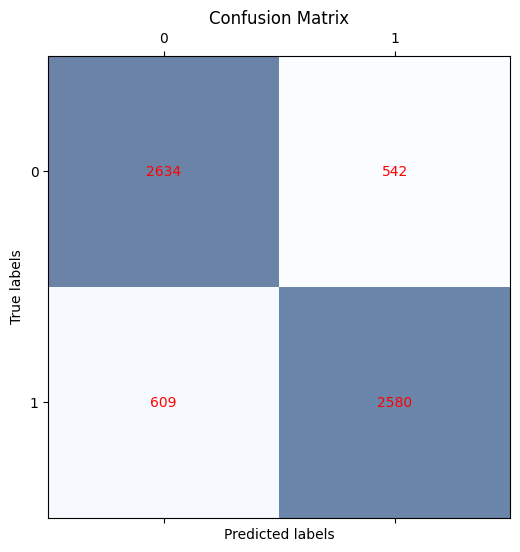

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def word2vec_sentiment_analysis(df):
    """
    Word2Vec ve bir makine öğrenimi modeli ile duygu analizi yapar.
    """
    # Eğitim ve test setine ayırma
    X_train, X_test, y_train, y_test = split_data(df, 'cleaned_review', 'Sentiment')

    # Word2Vec modelini eğit
    word2vec_model = train_word2vec(X_train)

    # Word2Vec ile veriyi vektörize et
    X_train_vec = vectorize_text_with_word2vec(X_train, word2vec_model)
    X_test_vec = vectorize_text_with_word2vec(X_test, word2vec_model)

    # SMOTE uygula
    X_train_resampled, y_train_resampled = apply_smote(X_train_vec, y_train)

    # Model oluştur ve değerlendir
    model = LogisticRegression(random_state=42)
    accuracy, report, cm = train_and_evaluate_model(model, X_train_resampled, y_train_resampled, X_test_vec, y_test)

    return accuracy, report, cm

# Word2Vec ile duygu analizi fonksiyonunu çalıştır
accuracy_word2vec, report_word2vec, cm_word2vec = word2vec_sentiment_analysis(balanced_data)

# Sonuçları yazdır
print("Word2Vec Sentiment Analysis Accuracy:", accuracy_word2vec)
print("Word2Vec Sentiment Analysis Classification Report:\n", report_word2vec)
print("Word2Vec Sentiment Analysis Confusion Matrix:\n", cm_word2vec)

# Confusion Matrix görselleştirmesi
plot_confusion_matrix(cm_word2vec)

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
import numpy as np

def evaluate_recommendations(true_labels, predicted_labels):
    """
    Gerçek etiketler (beğeniler) ve tahmin edilen etiketler (öneriler) arasındaki doğruluğu ölçer.
    """
    relevant_recommendations = [item for item in predicted_labels if item in true_labels]
    num_relevant_recommendations = len(relevant_recommendations)

    precision = num_relevant_recommendations / len(predicted_labels) if len(predicted_labels) > 0 else 0
    recall = num_relevant_recommendations / len(true_labels) if len(true_labels) > 0 else 0
    accuracy = sum(1 for item in true_labels if item in predicted_labels) / len(true_labels) if len(true_labels) > 0 else 0

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")

def content_based_recommendation(df, user_id, top_n=5):
    # Kullanıcıya ait yorumları al
    user_reviews = df[df['UserId'] == user_id]

    # Temizlenmiş yorumları ve ürün ID'lerini al
    user_reviews = user_reviews[['cleaned_review', 'ProductId', 'Sentiment']]

    # Boş yorumları kontrol et ve kaldır
    user_reviews = user_reviews[user_reviews['cleaned_review'] != '']

    # Yeterli yorum yoksa, öneri yapılamaz
    if len(user_reviews) == 0:
        print(f"User {user_id} için yeterli yorum bulunamadı. Öneri yapılamıyor.")
        return []

    # TF-IDF modelini fit et (hem kullanıcı yorumları hem de tüm ürün yorumları için aynı model)
    tfidf_model = TfidfVectorizer(stop_words='english')
    all_reviews = df['cleaned_review'].tolist() + user_reviews['cleaned_review'].tolist()
    tfidf_matrix_all = tfidf_model.fit_transform(all_reviews)

    # Kullanıcı yorumları için vektörleştirme
    X_user = tfidf_matrix_all[-len(user_reviews):]

    # Tüm ürünlerin yorumları için vektörleştirme
    X_all_products = tfidf_matrix_all[:len(df)]

    # Kullanıcı yorumları ile tüm ürünler arasındaki benzerlik hesapla
    similarities = cosine_similarity(X_user, X_all_products)

    # Benzerlikleri yüksekten düşüğe sıralama
    top_n_indices = similarities.argsort()[:, -top_n:]

    # En benzer ürünlerin ID'lerini al
    recommended_product_ids = df['ProductId'].iloc[top_n_indices.flatten()].unique()

    # Gerçek beğenileri (yani kullanıcı tarafından beğenilen ürünler) al
    true_labels = df[(df['UserId'] == user_id) & (df['Sentiment'] == 1)]['ProductId'].values

    # Gerçek ve tahmin edilen etiketler
    predicted_labels = recommended_product_ids

    # Performansı ölç
    evaluate_recommendations(true_labels, predicted_labels)

    return recommended_product_ids

def collaborative_filtering(df, user_id, top_n=5):
    """
    Kullanıcılar arasındaki benzerliklere dayalı işbirlikçi filtreleme öneri sistemi.
    """
    user_reviews = df[df['UserId'] == user_id]
    user_reviews = user_reviews[['ProductId', 'Sentiment']]

    # Kullanıcılar arası benzerlik hesaplamak için pivot tablosu oluştur
    user_product_matrix = df.pivot_table(index='UserId', columns='ProductId', values='Sentiment', aggfunc='mean').fillna(0)

    # Kullanıcılar arasındaki benzerlik matrisi (pearson correlation)
    user_similarity = 1 - pairwise_distances(user_product_matrix, metric='cosine')

    # Bu kullanıcıya benzer kullanıcıların ID'lerini bul
    user_idx = user_product_matrix.index.get_loc(user_id)
    similar_users = user_similarity[user_idx].argsort()[-top_n-1:-1][::-1]

    # Benzer kullanıcılardan gelen ürünleri öner
    similar_user_ids = user_product_matrix.index[similar_users]
    recommended_products = []

    for similar_user_id in similar_user_ids:
        similar_user_reviews = df[df['UserId'] == similar_user_id]
        recommended_products.extend(similar_user_reviews['ProductId'].tolist())

    recommended_product_ids = list(set(recommended_products))[:top_n]
    true_labels = user_reviews[user_reviews['Sentiment'] == 1]['ProductId'].values
    predicted_labels = recommended_product_ids

    evaluate_recommendations(true_labels, predicted_labels)

    return recommended_product_ids

# İlk 'UserId' değerini almak
user_id = balanced_data['UserId'].iloc[0]
print("İlk UserId:", user_id)

# Kullanıcı için içerik tabanlı öneriler
recommended_product_ids_content = content_based_recommendation(balanced_data, user_id, top_n=5)
print("İçerik Tabanlı Önerilen Ürünler:", recommended_product_ids_content)

# Kullanıcı için işbirlikçi filtreleme önerileri
recommended_product_ids_collaborative = collaborative_filtering(balanced_data, user_id, top_n=5)
print("İşbirlikçi Filtreleme Önerilen Ürünler:", recommended_product_ids_collaborative)

İlk UserId: A7B49JA8ZZ1RQ
Precision: 0.25
Recall: 1.0
Accuracy: 1.0
İçerik Tabanlı Önerilen Ürünler: ['B005V9UG18' 'B003QGQCYI' 'B006W5WGFE' 'B000EVQ2O8' 'B000FMZO90'
 'B000EML7DS' 'B000IHJEDE' 'B0017SUVVM']
Precision: 0.2
Recall: 0.5
Accuracy: 0.5
İşbirlikçi Filtreleme Önerilen Ürünler: ['B001KEF8PM', 'B000YTAXBS', 'B000EVQ2O8', 'B000LKYYT2', 'B0002DGRRA']


In [ ]:
def hybrid_recommendation(df, user_id, top_n=5, alpha=0.5):
    """
    Hibrit öneri sistemi: İçerik tabanlı ve işbirlikçi filtreleme sonuçlarını birleştirir.
    """
    # İçerik tabanlı öneri sisteminden ürünleri al
    content_recommended = content_based_recommendation(df, user_id, top_n=top_n)

    # İşbirlikçi filtreleme öneri sisteminden ürünleri al
    collaborative_recommended = collaborative_filtering(df, user_id, top_n=top_n)

    # İçerik tabanlı ve işbirlikçi filtreleme sonuçlarının kesişimi
    hybrid_recommended = list(set(content_recommended).intersection(set(collaborative_recommended)))

    # Eğer kesişim yoksa, içerik ve işbirlikçi öneri sonuçlarını ağırlıklı bir şekilde birleştir
    if len(hybrid_recommended) == 0:
        hybrid_recommended = content_recommended[:int(top_n * alpha)] + collaborative_recommended[:int(top_n * (1 - alpha))]

    # Ağırlıklı birleştirilmiş sonuçları döndür
    return hybrid_recommended

# İlk 'UserId' değerini almak
user_id = balanced_data['UserId'].iloc[0]
print("İlk UserId:", user_id)

# Hibrit öneri sistemi ile ürünleri almak
recommended_product_ids_hybrid = hybrid_recommendation(balanced_data, user_id, top_n=5, alpha=0.5)
print("Hibrit Önerilen Ürünler:", recommended_product_ids_hybrid)

# Hibrit önerilerin performansını ölçmek
true_labels = balanced_data[balanced_data['UserId'] == user_id][balanced_data['Sentiment'] == 1]['ProductId'].values
predicted_labels = recommended_product_ids_hybrid
evaluate_recommendations(true_labels, predicted_labels)

İlk UserId: A7B49JA8ZZ1RQ
Precision: 0.25
Recall: 1.0
Accuracy: 1.0
Precision: 0.2
Recall: 0.5
Accuracy: 0.5
Hibrit Önerilen Ürünler: ['B000EVQ2O8']
Precision: 1.0
Recall: 0.5
Accuracy: 0.5


<ipython-input-20-69d5f22a6a1f>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_labels = balanced_data[balanced_data['UserId'] == user_id][balanced_data['Sentiment'] == 1]['ProductId'].values


Precision: 0.25
Recall: 1.0
Accuracy: 1.0


<ipython-input-21-4be2eeac0a88>:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_labels = df[df['UserId'] == user_id][df['Sentiment'] == 1]['ProductId'].values


Precision: 0.2
Recall: 0.5
Accuracy: 0.5


<ipython-input-21-4be2eeac0a88>:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_labels = df[df['UserId'] == user_id][df['Sentiment'] == 1]['ProductId'].values


Precision: 0.25
Recall: 1.0
Accuracy: 1.0
Precision: 0.2
Recall: 0.5
Accuracy: 0.5


<ipython-input-21-4be2eeac0a88>:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_labels = df[df['UserId'] == user_id][df['Sentiment'] == 1]['ProductId'].values


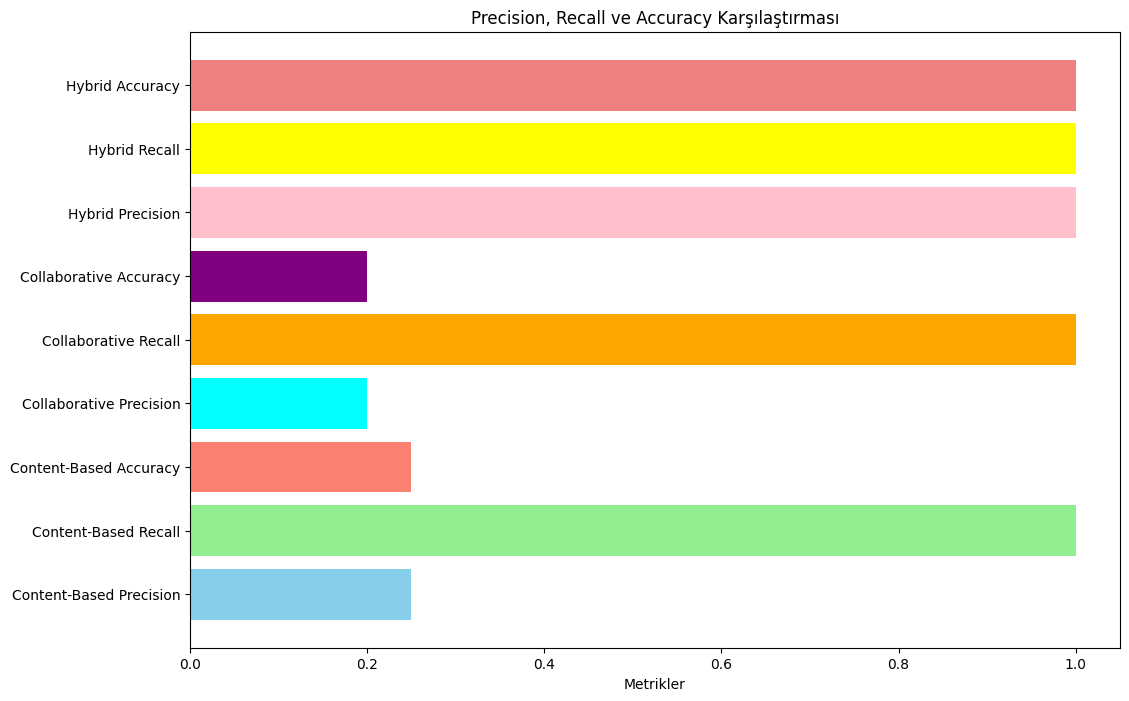

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

def plot_metrics_comparison(precision_content, recall_content, accuracy_content,
                            precision_collab, recall_collab, accuracy_collab,
                            precision_hybrid, recall_hybrid, accuracy_hybrid):
    """
    Precision, recall ve accuracy metriklerini karşılaştıran bir bar grafiği oluşturur.
    """
    metrics = [precision_content, recall_content, accuracy_content,
               precision_collab, recall_collab, accuracy_collab,
               precision_hybrid, recall_hybrid, accuracy_hybrid]

    method_names = ['Content-Based Precision', 'Content-Based Recall', 'Content-Based Accuracy',
                    'Collaborative Precision', 'Collaborative Recall', 'Collaborative Accuracy',
                    'Hybrid Precision', 'Hybrid Recall', 'Hybrid Accuracy']

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.barh(method_names, metrics, color=['skyblue', 'lightgreen', 'salmon', 'cyan', 'orange', 'purple', 'pink', 'yellow', 'lightcoral'])
    ax.set_xlabel('Metrikler')
    ax.set_title('Precision, Recall ve Accuracy Karşılaştırması')

    plt.show()

# Öneri metriklerinin hesaplanması için
def get_recommended_products_for_evaluation(df, user_id, method="content", top_n=5):
    """
    İçerik tabanlı, işbirlikçi veya hibrit öneriler için öneri ürünlerini döndüren fonksiyon.
    """
    if method == "content":
        predicted_labels = content_based_recommendation(df, user_id, top_n)
    elif method == "collaborative":
        predicted_labels = collaborative_filtering(df, user_id, top_n)
    elif method == "hybrid":
        predicted_labels = hybrid_recommendation(df, user_id, top_n)
    else:
        raise ValueError("Geçersiz yöntem seçimi.")

    # Gerçek etiketler (beğenilen ürünler) almak
    true_labels = df[df['UserId'] == user_id][df['Sentiment'] == 1]['ProductId'].values

    # Performansı ölçmek için değerlendirme fonksiyonu çağır
    return true_labels, predicted_labels

# Örnek kullanıcı ID'si
user_id = balanced_data['UserId'].iloc[0]

# İçerik tabanlı öneri
true_labels, content_predicted = get_recommended_products_for_evaluation(balanced_data, user_id, method="content", top_n=5)

# İşbirlikçi öneri
_, collaborative_predicted = get_recommended_products_for_evaluation(balanced_data, user_id, method="collaborative", top_n=5)

# Hibrit öneri
_, hybrid_predicted = get_recommended_products_for_evaluation(balanced_data, user_id, method="hybrid", top_n=5)

# Binary encoding for Precision, Recall, Accuracy calculation
def get_binary_encoding(true_labels, predicted_labels):
    binary_true = [1 if item in true_labels else 0 for item in predicted_labels]
    return binary_true

# Metrik hesaplamaları
precision_content = precision_score(get_binary_encoding(true_labels, content_predicted), [1]*len(content_predicted), zero_division=1)
recall_content = recall_score(get_binary_encoding(true_labels, content_predicted), [1]*len(content_predicted), zero_division=1)
accuracy_content = accuracy_score(get_binary_encoding(true_labels, content_predicted), [1]*len(content_predicted))

precision_collab = precision_score(get_binary_encoding(true_labels, collaborative_predicted), [1]*len(collaborative_predicted), zero_division=1)
recall_collab = recall_score(get_binary_encoding(true_labels, collaborative_predicted), [1]*len(collaborative_predicted), zero_division=1)
accuracy_collab = accuracy_score(get_binary_encoding(true_labels, collaborative_predicted), [1]*len(collaborative_predicted))

precision_hybrid = precision_score(get_binary_encoding(true_labels, hybrid_predicted), [1]*len(hybrid_predicted), zero_division=1)
recall_hybrid = recall_score(get_binary_encoding(true_labels, hybrid_predicted), [1]*len(hybrid_predicted), zero_division=1)
accuracy_hybrid = accuracy_score(get_binary_encoding(true_labels, hybrid_predicted), [1]*len(hybrid_predicted))

# Görselleştirme
plot_metrics_comparison(precision_content, recall_content, accuracy_content,
                        precision_collab, recall_collab, accuracy_collab,
                        precision_hybrid, recall_hybrid, accuracy_hybrid)

Precision: 0.25
Recall: 1.0
Accuracy: 1.0
Precision: 0.2
Recall: 0.5
Accuracy: 0.5
Precision: 0.25
Recall: 1.0
Accuracy: 1.0
Precision: 0.2
Recall: 0.5
Accuracy: 0.5


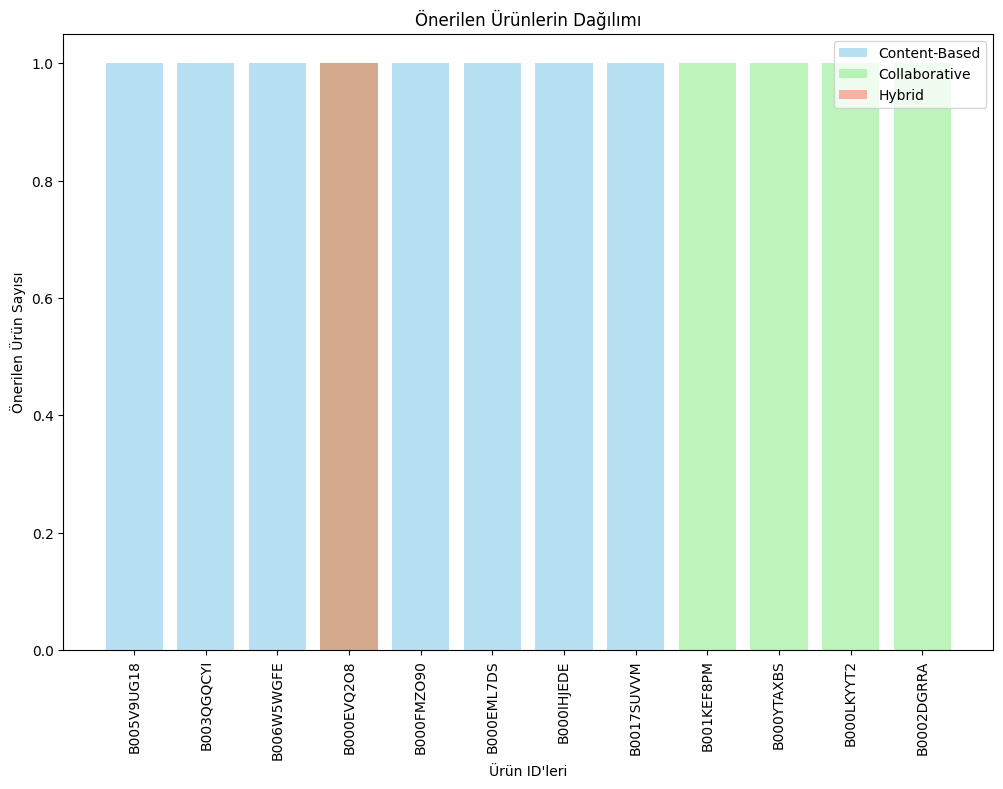

In [ ]:
from collections import Counter

def plot_recommended_products_distribution(content_predicted, collaborative_predicted, hybrid_predicted):
    """
    Üç farklı öneri yöntemine göre önerilen ürünlerin dağılımını gösterir.
    """
    # Ürünlerin sayısını say
    content_product_counts = Counter(content_predicted)
    collaborative_product_counts = Counter(collaborative_predicted)
    hybrid_product_counts = Counter(hybrid_predicted)

    # Ürünleri ve sayıları al
    content_products, content_counts = zip(*content_product_counts.items())
    collaborative_products, collaborative_counts = zip(*collaborative_product_counts.items())
    hybrid_products, hybrid_counts = zip(*hybrid_product_counts.items())

    # Grafiği oluştur
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.bar(content_products, content_counts, label="Content-Based", color='skyblue', alpha=0.6)
    ax.bar(collaborative_products, collaborative_counts, label="Collaborative", color='lightgreen', alpha=0.6)
    ax.bar(hybrid_products, hybrid_counts, label="Hybrid", color='salmon', alpha=0.6)

    ax.set_xlabel('Ürün ID\'leri')
    ax.set_ylabel('Önerilen Ürün Sayısı')
    ax.set_title('Önerilen Ürünlerin Dağılımı')
    ax.legend()

    plt.xticks(rotation=90)
    plt.show()

# Dinamik olarak öneri sistemlerinin çıktısını almak
content_predicted = content_based_recommendation(balanced_data, user_id, top_n=5)
collaborative_predicted = collaborative_filtering(balanced_data, user_id, top_n=5)
hybrid_predicted = hybrid_recommendation(balanced_data, user_id, top_n=5)

# Görselleştirme
plot_recommended_products_distribution(content_predicted, collaborative_predicted, hybrid_predicted)
